## Rabi oscillations

We introduce an exactly solvable two-level system. We will first simulate the evolution of the system using $\texttt{qiskit\_dynamics}$. Then, we will compute the probabilities for the ground and excited states and compare them to analitical results.

### The Hamiltonian

We consider a time-dependent system whose Hamiltonian can be expressed as
$$\hat{H} = \hat{H}_0 + \hat{H}_d$$ 

where $$\hat{H}_0 = \frac{1}{2} \hbar w \hat{\sigma}_z = \frac{1}{2}\begin{pmatrix} \hbar w & 0\\ 0 & -\hbar w \end{pmatrix}$$

and

$$\hat{H}_d = \hbar \gamma \begin{pmatrix} 0 & e^{-iw_d t} \\ e^{iw_d t} & 0 \end{pmatrix}$$

### Setting up the solver with the Hamiltonian model

In the following we consider $\hbar = 1$ and fix some arbitrary time units. We first set a few values for the frequencies of the Hamiltonian and then set up the $\texttt{Solver}$ class that stores and manipuates the model to be solved.

In [1]:
import numpy as np
from qiskit.quantum_info import Operator
from qiskit_dynamics import Solver, Signal

In [2]:
# Parameter values
w = 5.*2*np.pi
w_d = 4.98*2*np.pi
gamma = 1.*2*np.pi

In [3]:
# Operators
X = Operator.from_label('X')
Y = Operator.from_label('Y')
Z = Operator.from_label('Z')

In [4]:
# Hamiltonian
solver = Solver(
            static_hamiltonian = 0.5*w*Z,
            hamiltonian_operators = [gamma*X, gamma*Y]        
)

signals = [Signal(envelope = 1, carrier_freq = w_d/(2*np.pi)), Signal(envelope = -1j, carrier_freq = w_d/(2*np.pi))]

### Solving the system

We define the initial state of the system, the time span for which we simulate the evolution, the required time steps and solve the system.

In [5]:
from qiskit.quantum_info.states import Statevector

In [6]:
# Initial state
y0 = Statevector([1., 0.])

In [7]:
# Time span
t_final = 1
tau = .005

n_steps = int(np.ceil(t_final/tau)) + 1
t_eval = np.linspace(0., t_final, n_steps)

In [8]:
# Solution
sol = solver.solve(t_span=[0., t_final], y0=y0, signals=signals, t_eval=t_eval)

### Probabilities

We compute the probabilities for the ground and excited states using the solution of the simulation.

In [9]:
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Probabilities
g_state = np.zeros(len(sol.y))
e_state = np.zeros(len(sol.y))
for t_i, sol_t in enumerate(sol.y):
    g_state[t_i] = sol_t.probabilities()[0]
    e_state[t_i] = sol_t.probabilities()[1]

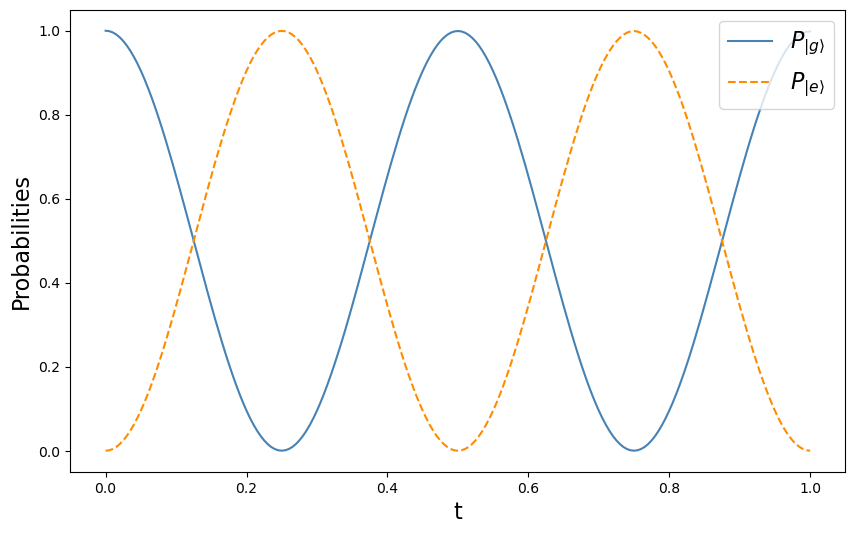

In [11]:
# Plots
_, ax = plt.subplots(figsize = (10, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(t_eval, g_state, '-', label = '$P_{|g \\rangle}$', color = 'steelblue')
plt.plot(t_eval, e_state, '--', label = '$P_{|e \\rangle}$', color = 'darkorange')
plt.legend(fontsize = 16, loc=1)
ax.set_xlabel('t', fontsize = 16)
ax.set_ylabel('Probabilities', fontsize = 16)
plt.savefig('Prob_sim_drive.pdf')

### Numerical derivation

Deriving the dinamics of the system anaytically, it can be proved that the transition probability to the excited state is given by $$ P_{|e \rangle} (t) = \frac{\gamma^2}{\Omega^2}\sin^2(\Omega t)$$

where $ \Omega = \sqrt{((w_d-w)/2)^2 + \gamma^2}$

With this expression we get

In [12]:
#Compute analytical probabilities
delta_w = w_d - w
omega = np.sqrt((delta_w/2)**2 + gamma**2)

pc0=np.zeros(len(t_eval))
pc1=np.zeros(len(t_eval))

for k, t_p in enumerate(t_eval):
    pc0[k]=(gamma**2/(omega**2))*np.sin(omega*t_p)**2
    pc1[k]=1-pc0[k]

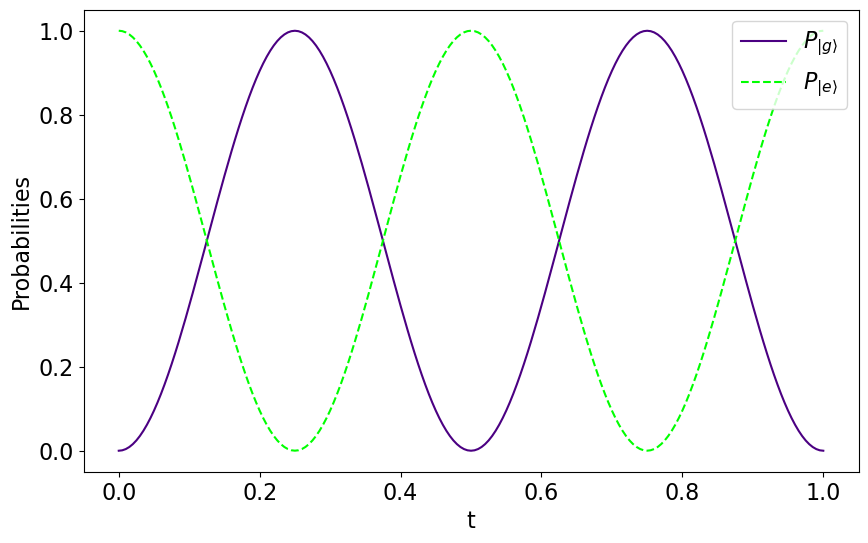

In [13]:
# Plots
_, ax = plt.subplots(figsize = (10, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(t_eval, pc0, '-', label = '$P_{|g \\rangle}$', color='indigo')
plt.plot(t_eval, pc1, '--', label = '$P_{|e \\rangle}$', color='lime')
plt.legend(fontsize = 16, loc=1)
ax.set_xlabel('t', fontsize = 16)
ax.set_ylabel('Probabilities', fontsize = 16)
plt.savefig('Prob_an_drive.pdf')

### Comparison

We can compare both the results from the simulation and from the analytical derivation

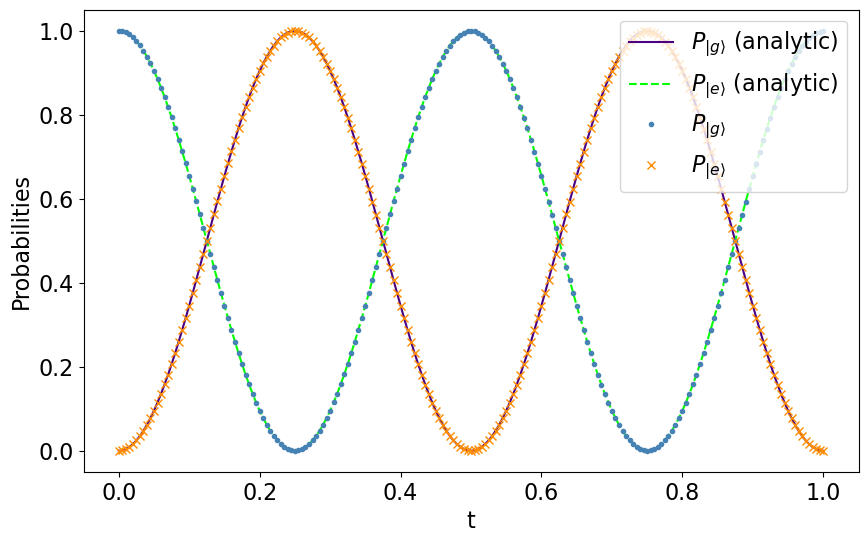

In [14]:
# Plots
_, ax = plt.subplots(figsize = (10, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(t_eval, pc0, '-', label = '$P_{|g \\rangle}$ (analytic)', color='indigo')
plt.plot(t_eval, pc1, '--', label = '$P_{|e \\rangle}$ (analytic)', color='lime')
plt.plot(t_eval, g_state, '.', label = '$P_{|g \\rangle}$', color = 'steelblue')
plt.plot(t_eval, e_state, 'x', label = '$P_{|e \\rangle}$', color = 'darkorange')
plt.legend(fontsize = 16, loc=1)
ax.set_xlabel('t', fontsize = 16)
ax.set_ylabel('Probabilities', fontsize = 16)
plt.savefig('Prob_comp.pdf')